In [27]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

In [34]:
# Target function
def p(x):
    return sts.norm.pdf(x, loc=-4, scale=0.5)+sts.norm.pdf(x, loc=4, scale=1)

In [39]:
# Proposal distribution
def q(x, x0, eps):
    #PDF
    return sts.norm.pdf(x, loc=x0, scale=eps)

def sample_from_q(x0, eps):
    # draw samples
    return sts.norm.rvs(loc=x0, scale=eps)

In [49]:
# Metropolis-Hastings algorithm
def run_MH(p, q, eps, x_init=0., n=1000):
    samples = np.empty(n)
    x_t = x_init
    for t in range(n):
        x_star = sample_from_q(x_t, eps)
        # Calculate acceptance rate
        a = (p(x_star)*q(x_t, x_star, eps)) / (
                p(x_t)*q(x_star, x_t, eps))
        if a > np.random.random():
            # Accept
            x_t = x_star
        samples[t] = x_t
    return samples

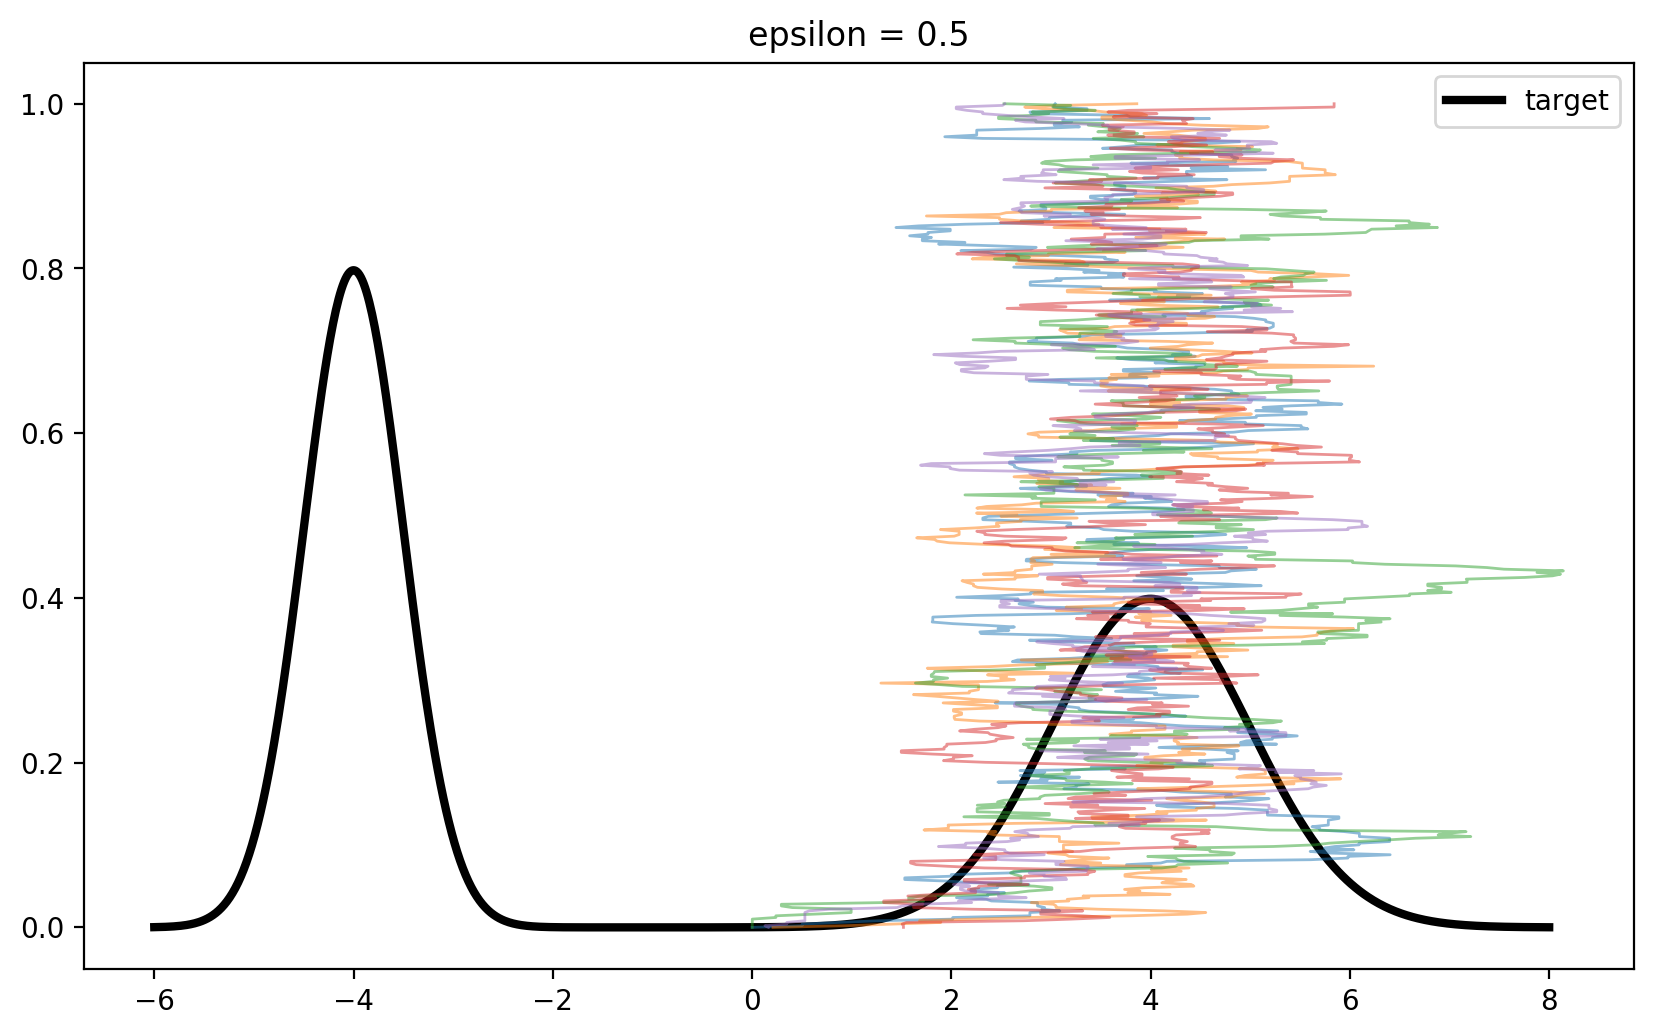

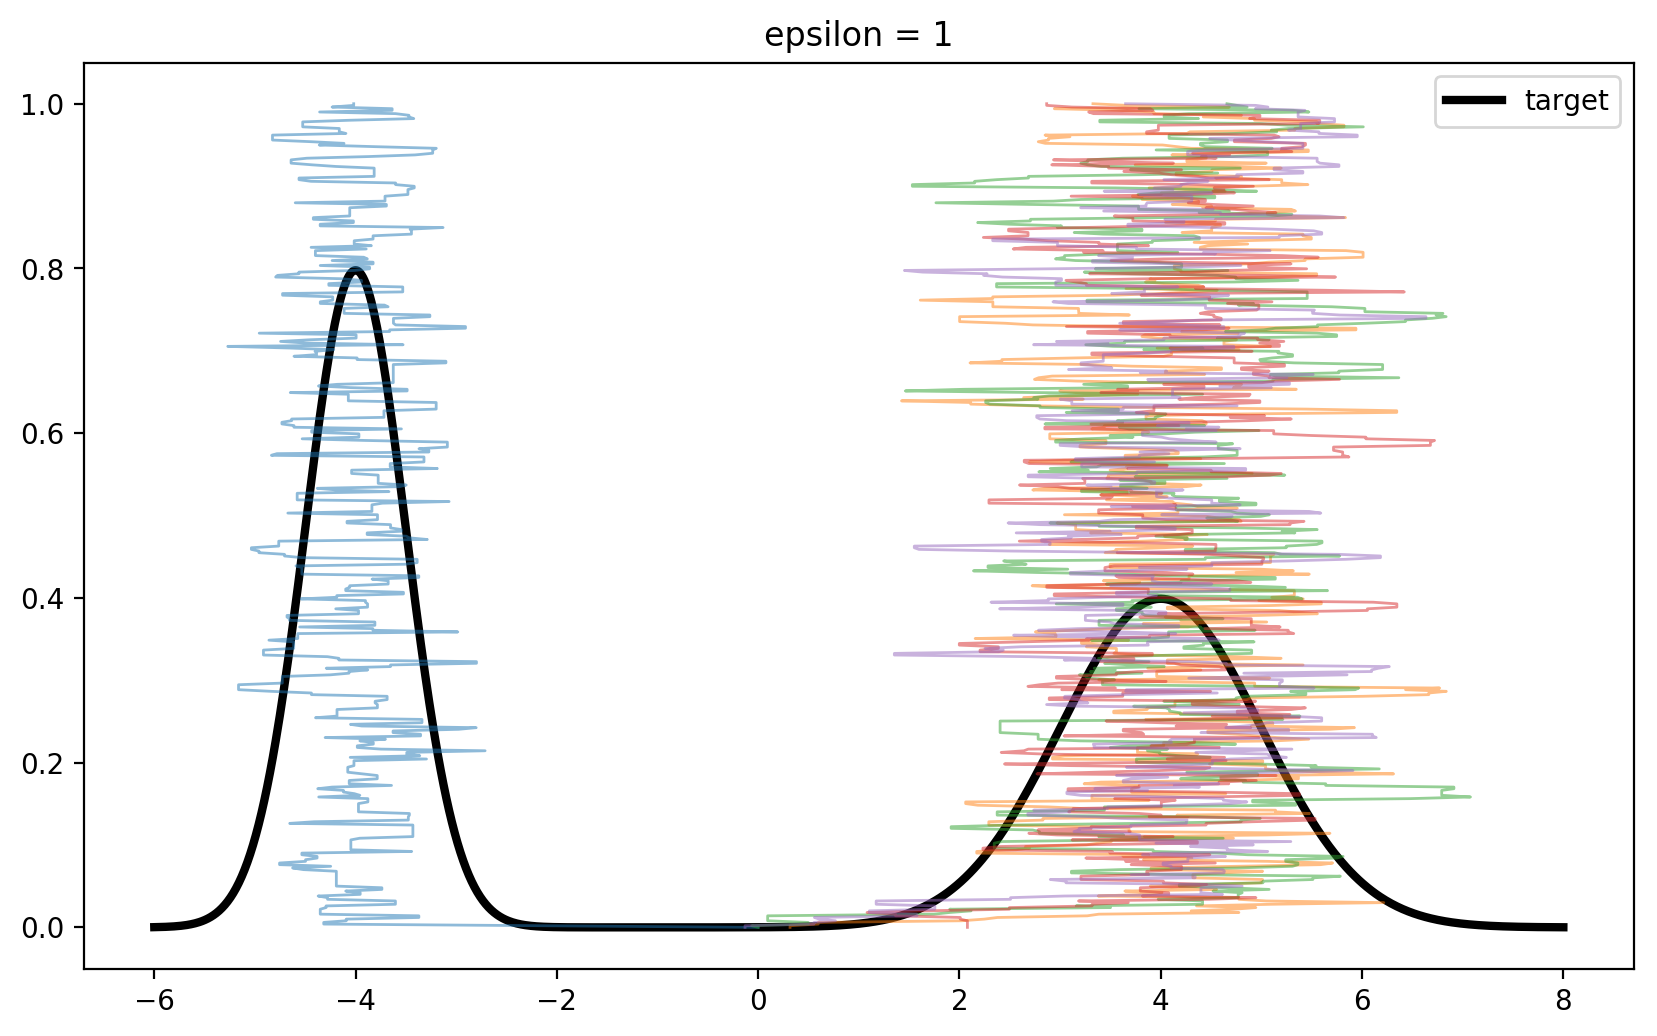

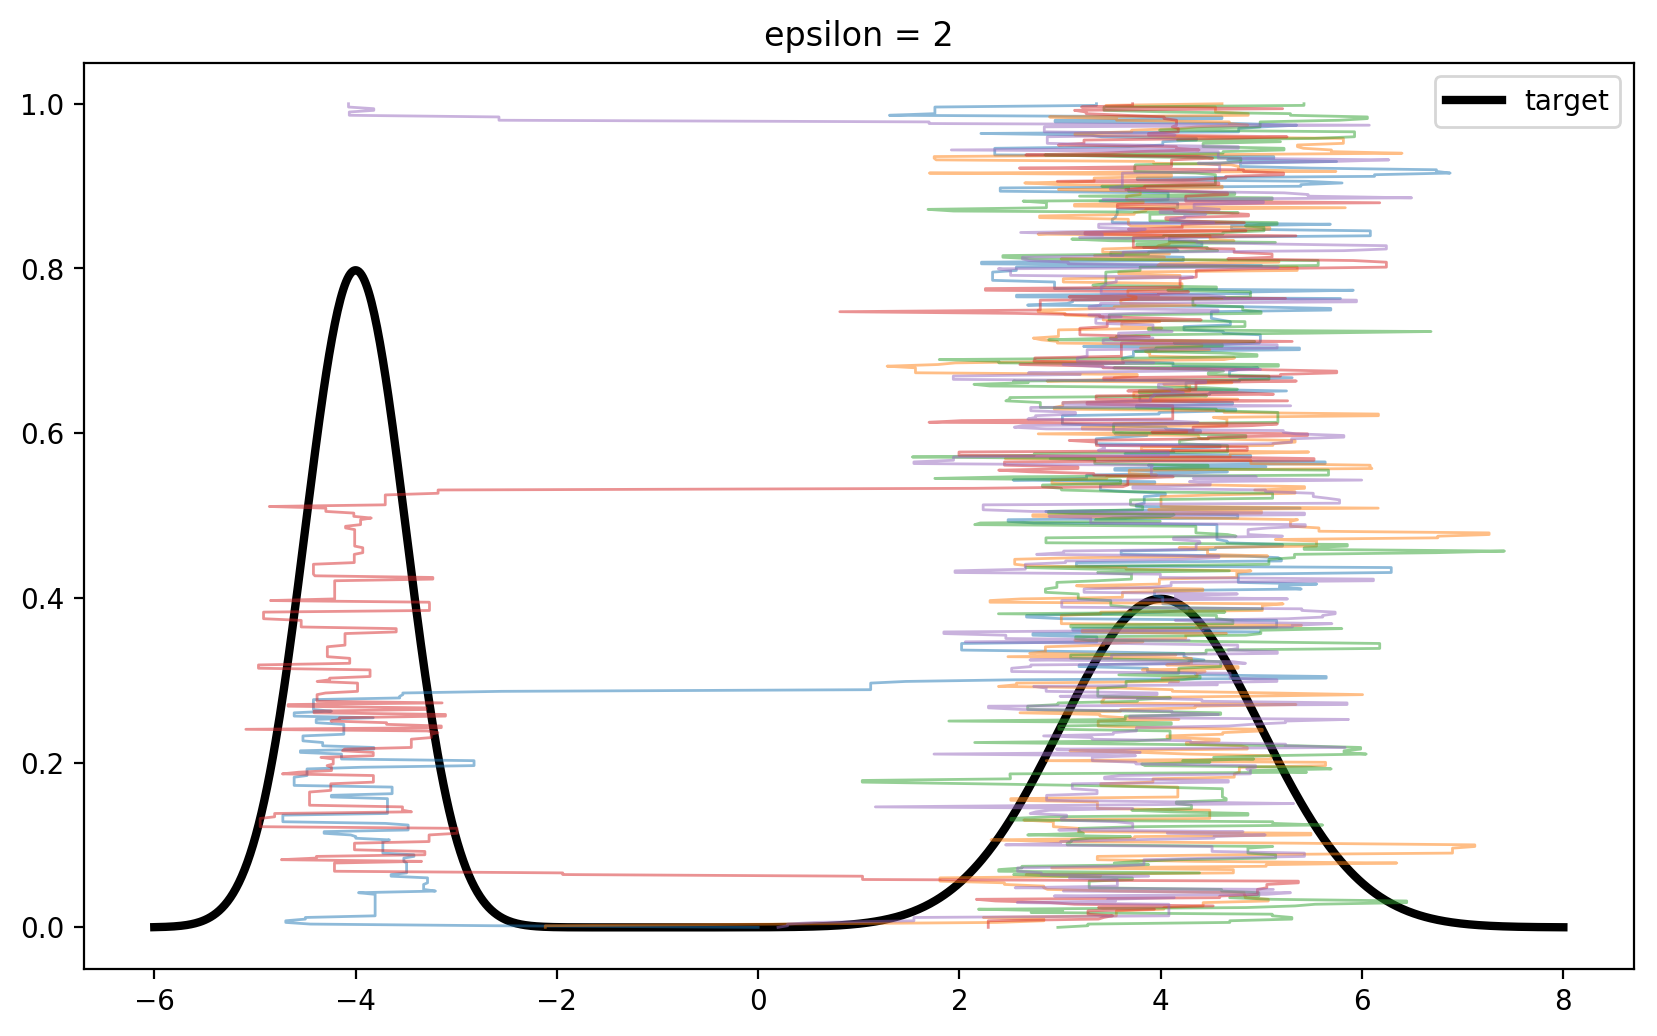

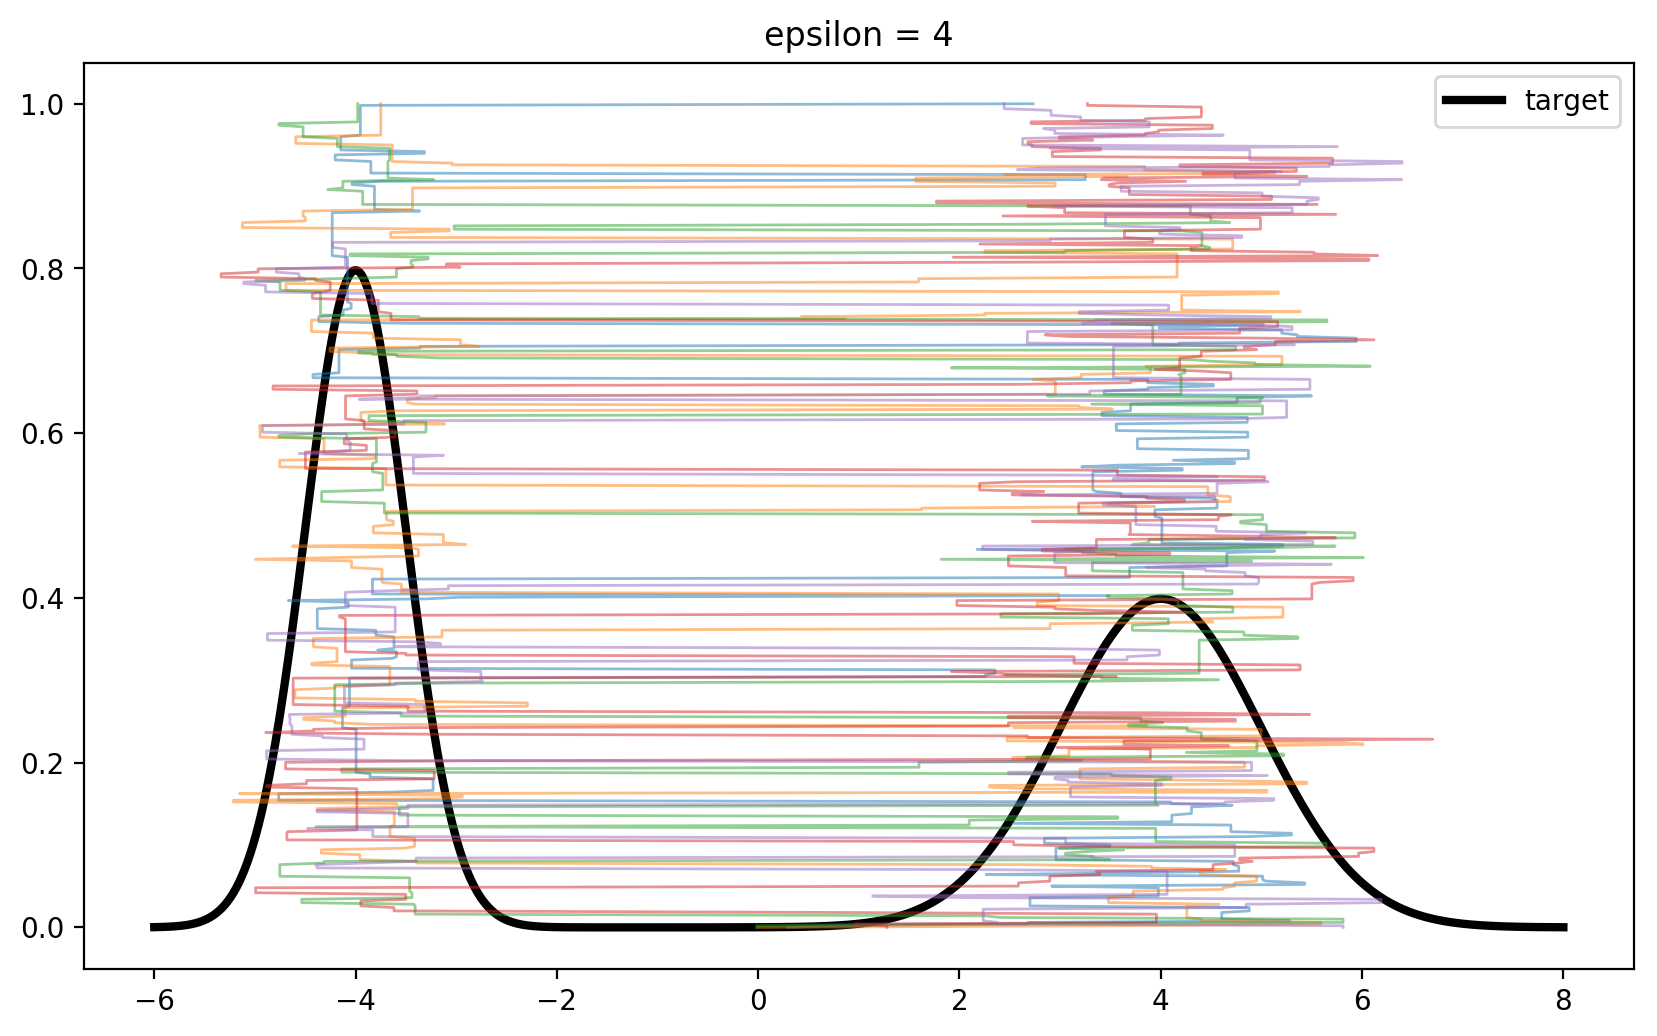

In [71]:
N = 500
for eps in [0.5, 1, 2, 4]:
    plt.figure(figsize=(10,6),dpi=200)
    x = np.linspace(-6, 8,1000)
    p_vec = np.vectorize(p)
    true_y = p_vec(x)
    plt.plot(x,true_y, label="target", linewidth=3, color="black")
    
    for i in range(5):
        samples = run_MH(p, q, eps, n=N)
        plt.plot(samples, np.linspace(0, 1.0, N),
                linewidth=1., alpha=0.5)
    plt.legend()
    plt.title("epsilon = {}".format(eps))
    plt.show()

Each plot contains five separate runs of the MH algorithm. We can see that when $\epsilon = 0.5$, all of them got stuck at the peak on the right. This is bad because it is very biased and does not reflect the true target distribution. As we increase $\epsilon$, we see that more of paths were able to jump to the other peak and sample from there. However, it can also be seen that as we increase $\epsilon$, there are more rejections (straight vertical segments on the paths) and the samples are more correlated. I think $\epsilon$ of 2 is probably the best if we run the algoirthm for longer (here it's only 500 steps). See below:

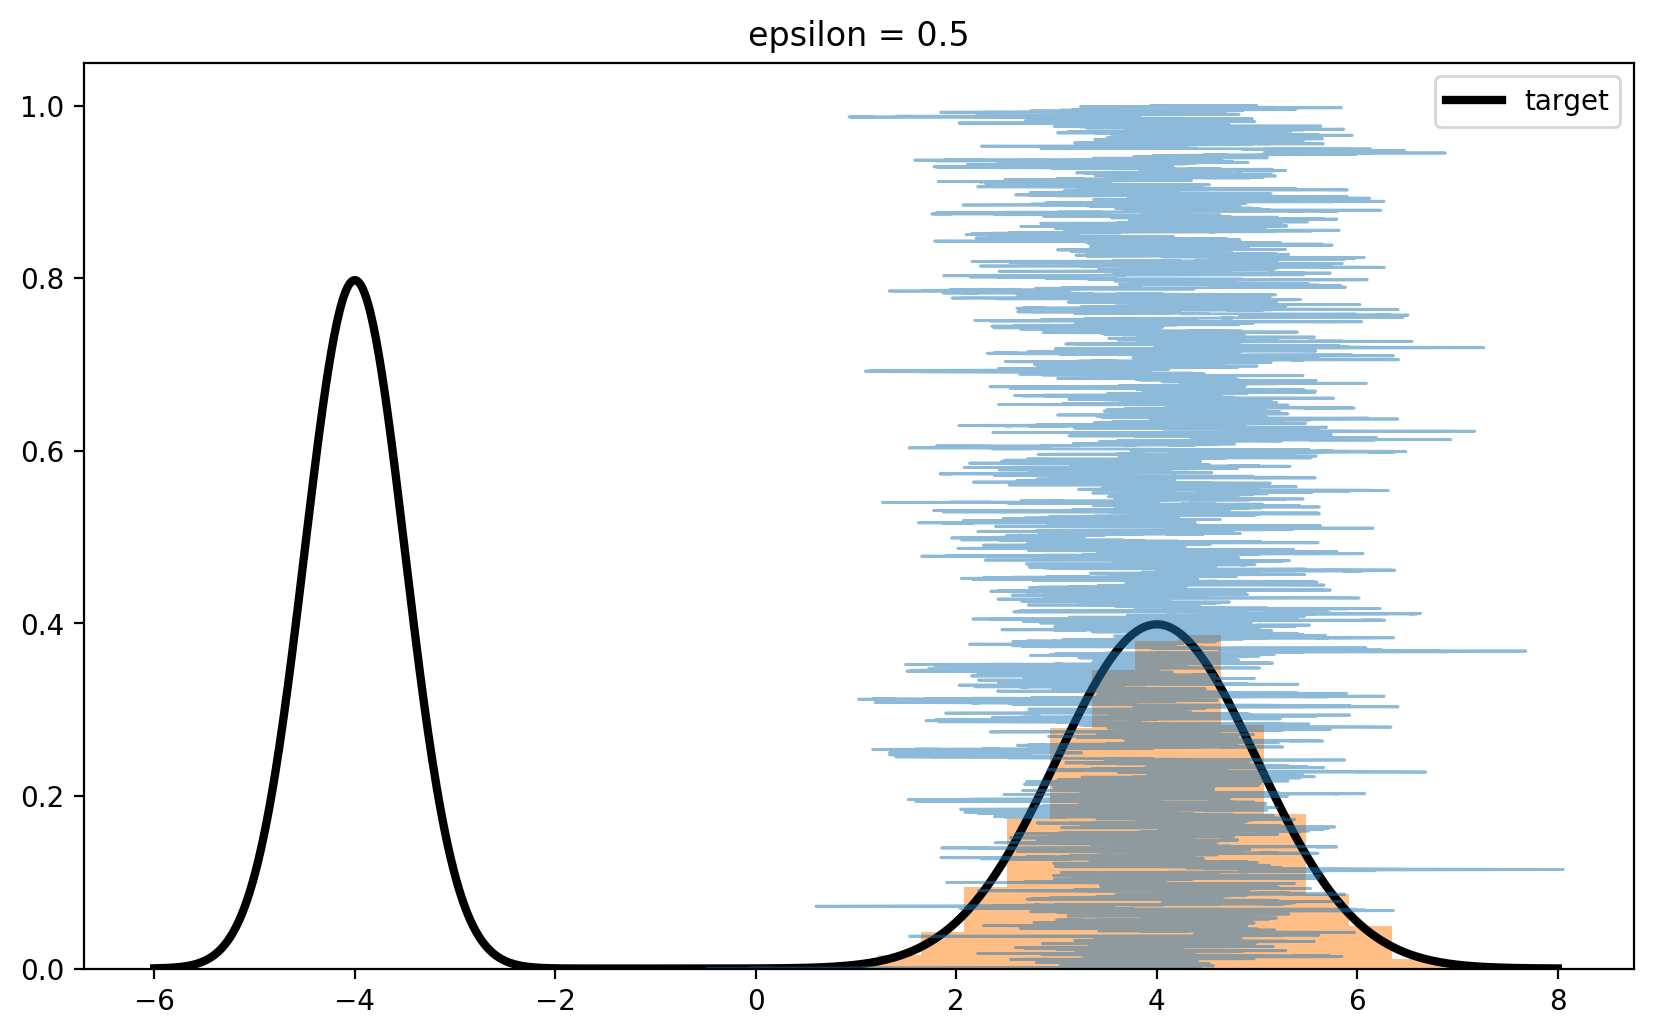

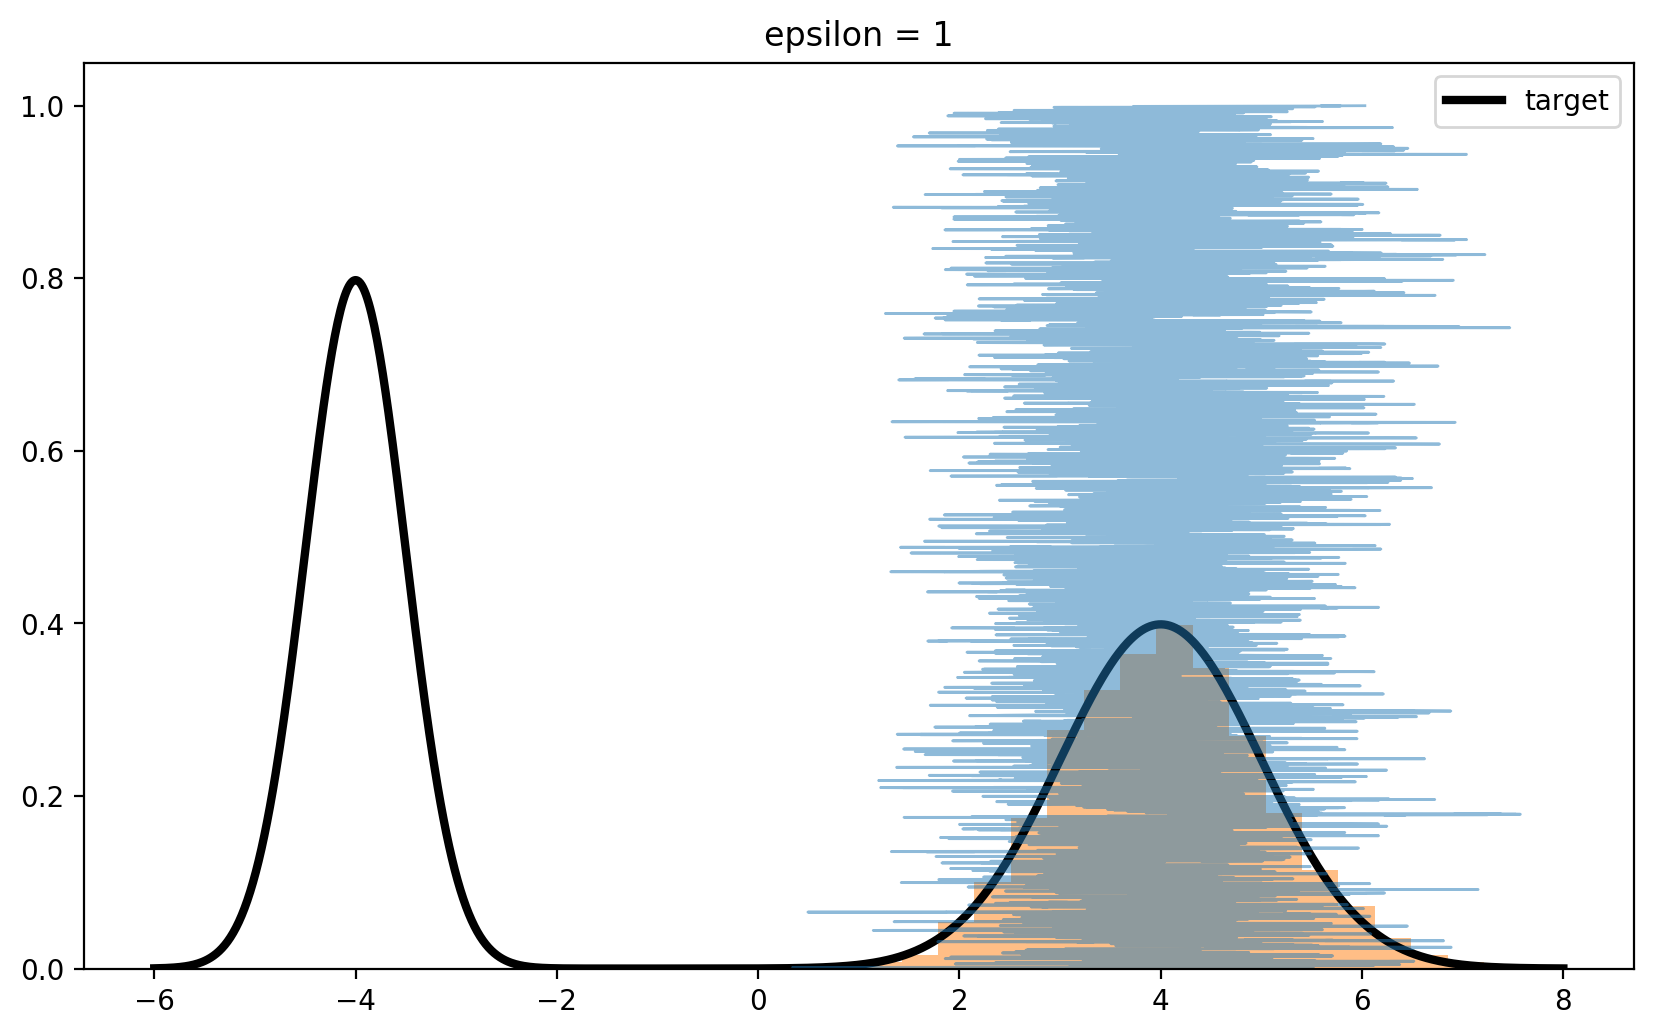

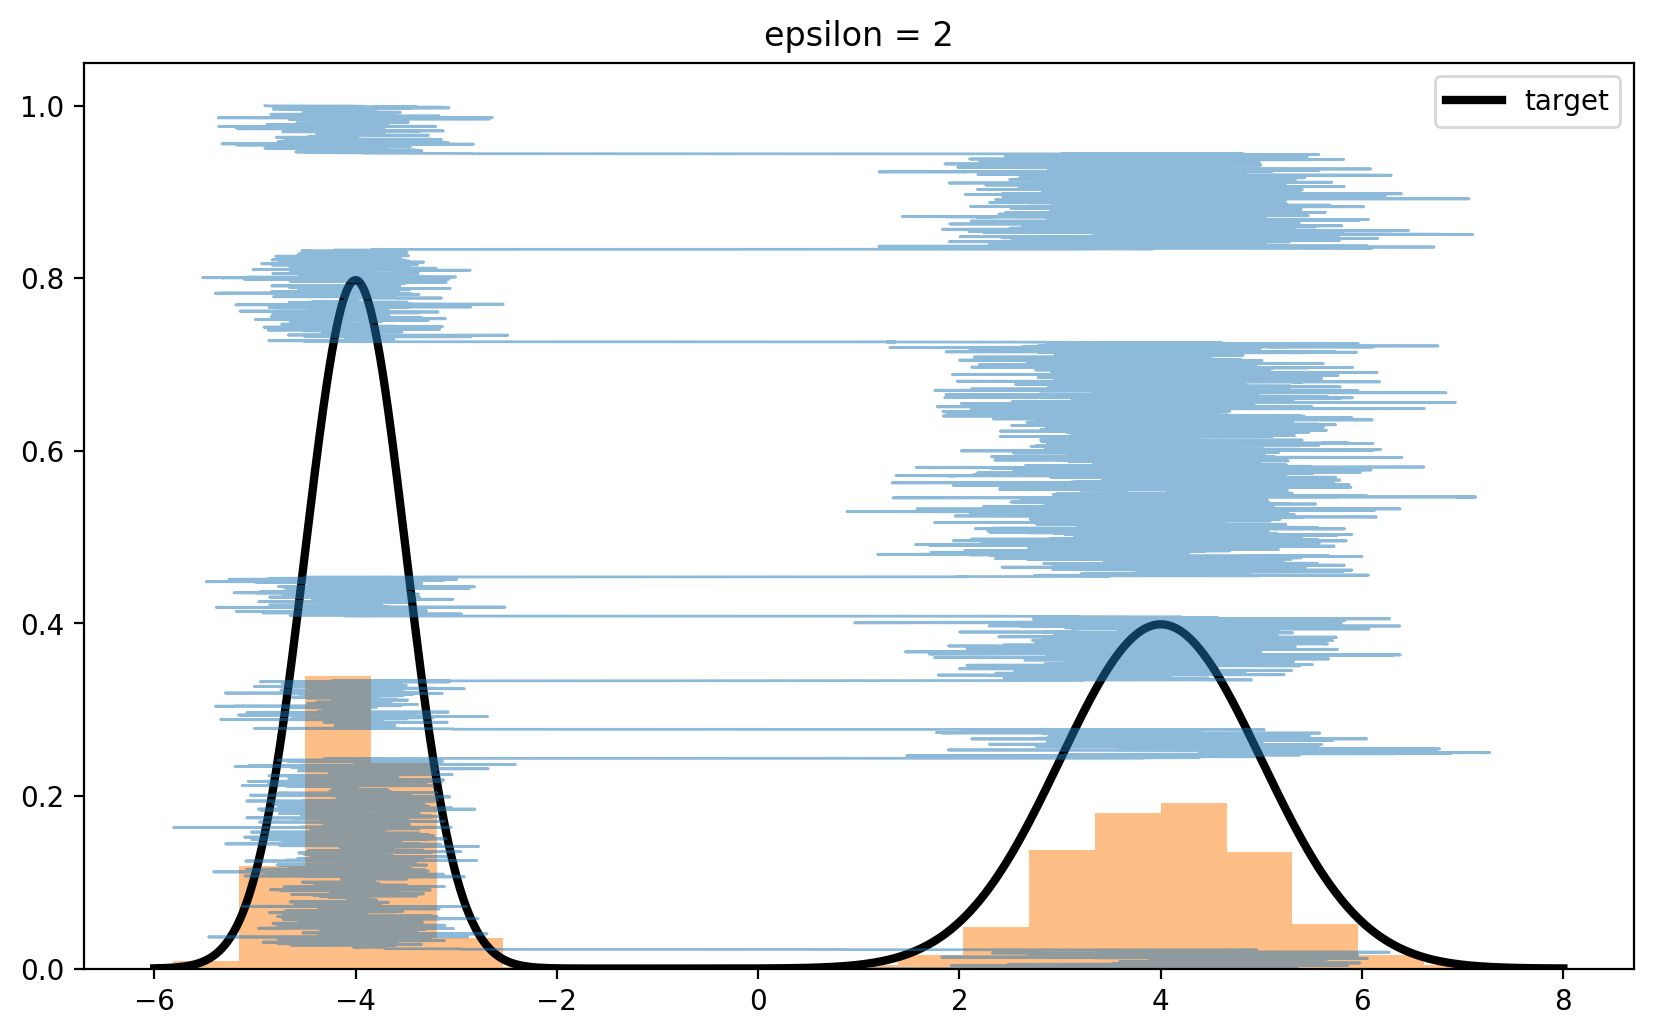

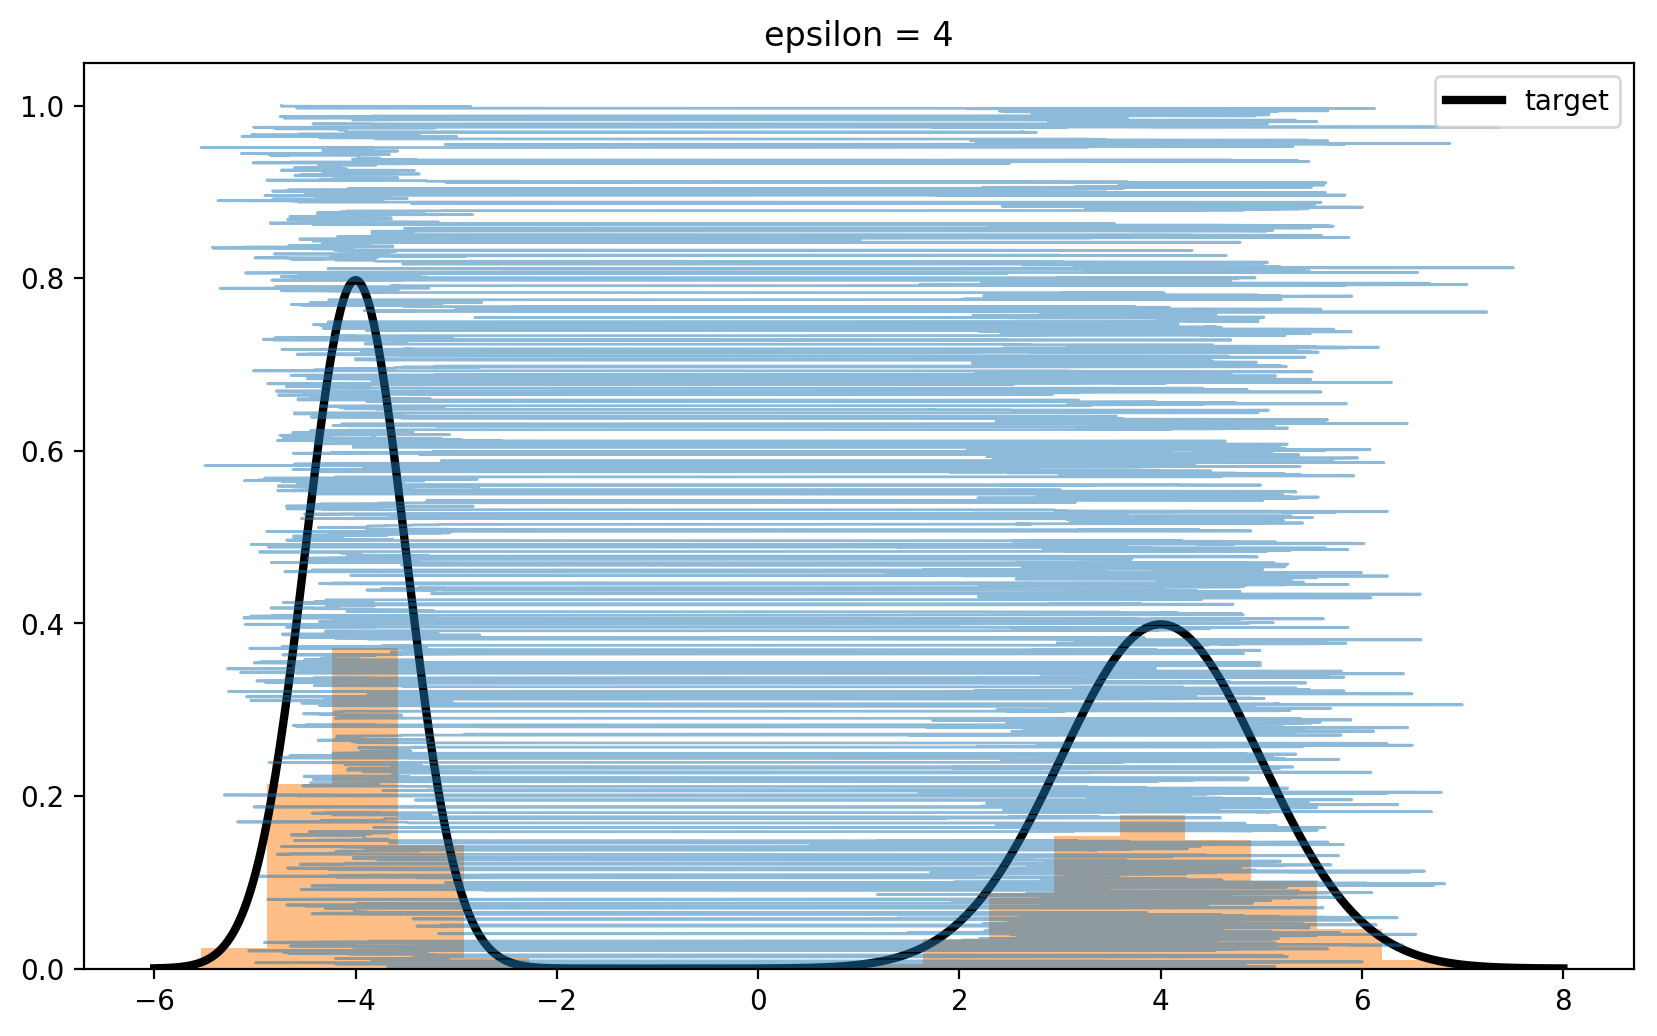

In [76]:
N = 10000
for eps in [0.5, 1, 2, 4]:
    plt.figure(figsize=(10,6),dpi=200)
    x = np.linspace(-6, 8,1000)
    p_vec = np.vectorize(p)
    true_y = p_vec(x)
    plt.plot(x,true_y, label="target", linewidth=3, color="black")

    samples = run_MH(p, q, eps, n=N)
    plt.plot(samples, np.linspace(0, 1.0, N),
            linewidth=1., alpha=0.5)
    plt.hist(samples, density=True, alpha=0.5, bins=20)
    plt.legend()
    plt.title("epsilon = {}".format(eps))
    plt.show()